In [122]:
import folium
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [117]:
# Control graph style

%matplotlib inline
sns.set_theme(style="darkgrid", palette="deep")
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [118]:
# Control font process
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/Users/PlayData/AppData/Local/Microsoft/Windows/Fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

EF_????
????
Dongle
NanumGothic
Dokdo
['NanumGothic']


## 지역별 사고 원인 시각화

In [5]:
law = pd.read_csv('law.csv')
law.head()

,지역구,지점명,도로명,중앙선침범,신호위반,안전거리미확보,불법유턴,과속,안전운전불이행,교차로위반,보행자보호위반,차로위반,직진우회전방해,기타
0,강남구,수서역사거리,NaN,0,2,5,0,0,6,1,0,1,0,1
1,강남구,양재전화국입구,NaN,0,4,2,0,0,11,1,0,0,0,0
2,강남구,신논현역 사거리,NaN,0,3,2,0,0,5,2,0,1,0,1
3,강남구,을지병원 앞 사거리,NaN,0,3,2,0,0,7,4,0,1,0,0
4,강남구,대치우성아파트 사거리,NaN,0,7,2,0,0,3,0,0,0,0,0


In [6]:
law_grouping_loc = law.groupby(law.지역구)
law_grouping_loc

In [7]:
law_df = law_grouping_loc.sum()
law_df2 = law_df.sum()
law_df2 = law_df2.sort_values()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '과속'),
  Text(1, 0, '직진우회전방해'),
  Text(2, 0, '불법유턴'),
  Text(3, 0, '중앙선침범'),
  Text(4, 0, '차로위반'),
  Text(5, 0, '기타'),
  Text(6, 0, '교차로위반'),
  Text(7, 0, '보행자보호위반'),
  Text(8, 0, '안전거리미확보'),
  Text(9, 0, '신호위반'),
  Text(10, 0, '안전운전불이행')])

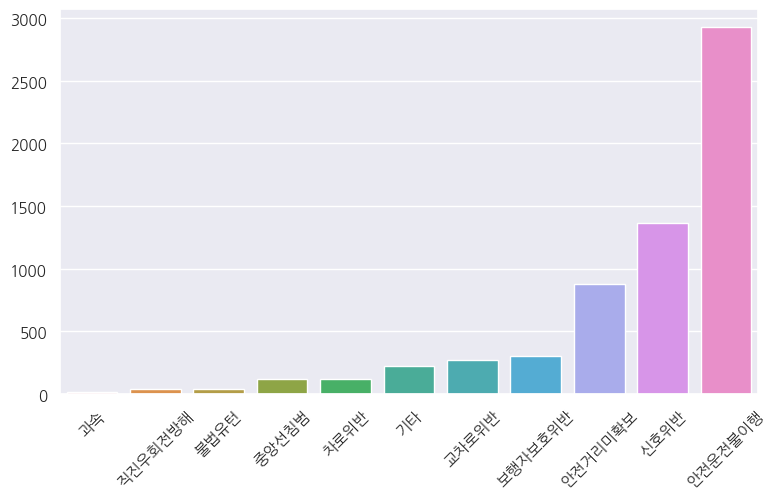

In [126]:
sns.barplot(x=law_df2.index, y=law_df2)
plt.xticks(rotation=45)

In [9]:
law['지역구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

## 사고지역 위도, 경도 추출

In [10]:
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

crd = geocoding("대구 태전동")
print(crd['lat'])
print(crd['lng'])

35.9234127
128.5459483


In [11]:
import requests, json
def get_location(address):
    try:
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
                    # 'KaKaoAK '는 그대로 두시고 개인키만 지우고 입력해 주세요.
                    # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
        headers = {"Authorization": "KakaoAK dcc9b973a293afda870240cbc42603c8"}
        api_json = json.loads(str(requests.get(url,headers=headers).text))
        address = api_json['documents'][0]['address']
        rcd =str(address['y']) + ','+ str(address['x'])
        address_name = address['address_name']
        return rcd
    except:
        return 'r,c'

In [12]:
tp_df = pd.read_csv('tp_file2.csv')
tp_df

,지점명,위치,발생건수,사망자수,보 기,MOTOCY_CNT,CYCLE_CNT,WALK_CNT,DRK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,수서역사거리,서울특별시 강남구 수서동 724 로즈데일오피스텔,16.0,0.0,NaN,1.0,2.0,0.0,0.0
2,양재전화국입구,서울특별시 강남구 도곡1동 207,18.0,0.0,NaN,1.0,0.0,0.0,0.0
3,신논현역 사거리,서울 강남구 강남대로 470,14.0,1.0,NaN,0.0,0.0,0.0,0.0
4,을지병원 앞 사거리,서울 강남구 논현동 279,17.0,0.0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
745,서울시체육회(새중랑교회),서울 중랑구 상봉중앙로8길 41,5.0,1.0,NaN,1.0,0.0,0.0,0.0
746,망우지구대 앞 사거리,서울 중랑구 망우동 535-10,9.0,0.0,NaN,1.0,1.0,0.0,0.0
747,동부시장 사거리(북동),서울 중랑구 면목동 1509-2,8.0,0.0,NaN,0.0,1.0,0.0,0.0
748,신내지하차도(하이마트상봉점),서울 중랑구 망우로 399,5.0,1.0,NaN,0.0,0.0,0.0,0.0


In [13]:
tp_df_latitude = []
tp_df_longtitude = []
for i in tp_df['위치']:
    lat, lng = get_location(i).split(',')
    tp_df_latitude.append(lat)
    tp_df_longtitude.append(lng)

In [14]:
from ipyleaflet import Map, Marker, MarkerCluster
marker = []
m = Map(center=(37.5, 127), zoom=5)
for i in range(len(tp_df_latitude)):
    marker.append(Marker(location = (tp_df_latitude[i], tp_df_longtitude[i])))
marker_cluster = MarkerCluster(markers = marker)
m.add_layer(marker_cluster)
m

Map(center=[37.5, 127], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

## 노인 보호구역 시각화

In [31]:
silver_csv = pd.read_csv('silver_zone.csv')
print(silver_csv.tail())

      연번  자치구         시설명             위치   지정일
165  166  강동구  성암장수마을 요양원     구천면로68길 46  2016
166  167  강동구   강동노인종합복지관    동남로71길 32-5  2018
167  168  강동구       쉼터경로당  올림픽로89길 27-23  2019
168  169  강동구     구립강암경로당   상암로15길 38-15  2020
169  170  강동구     일자산자연공원      둔촌동 산 125  2021


In [32]:
silver_address= silver_csv['위치']
print(silver_address.head())

0    율곡로19길 17-8
1      통일로14길 30
2       삼일대로 467
3       삼일대로 428
4            인의동
Name: 위치, dtype: object


In [33]:
latitude = []
longitude = []
for i in silver_address:
    lat, lng = get_location(i).split(',')
    latitude.append(lat)
    longitude.append(lng)

In [34]:
len(latitude)
len(longitude)

170

In [35]:
silver_address_df = pd.DataFrame({"시설명": silver_csv["시설명"],
                           '주소':silver_csv['위치'],
                           '위도':latitude,
                           '경도':longitude})

silver_address_df

,시설명,주소,위도,경도
0,종로노인종합복지관,율곡로19길 17-8,37.5766679096376,127.006020606379
1,종로노인종합복지관 무악센터,통일로14길 30,37.575816548027,126.958022080228
2,서울노인복지센터,삼일대로 467,37.5759657913407,126.985853298403
3,락희거리,삼일대로 428,37.5727635233966,126.987902476529
4,종묘광장공원 동순라길,인의동,37.5723311920992,126.997668102599
...,...,...,...,...
165,성암장수마을 요양원,구천면로68길 46,37.5486544703182,127.142465612824
166,강동노인종합복지관,동남로71길 32-5,37.5522111843463,127.15462055421
167,쉼터경로당,올림픽로89길 27-23,37.5467987956776,127.124086561623
168,구립강암경로당,상암로15길 38-15,37.5504579238426,127.132065946177


In [36]:
x = []
y = []
for i in range(len(silver_address_df['위도'])):
    if silver_address_df['위도'][i] == 0.0 or silver_address_df['경도'][i] == 0.0:
        pass
    else:
        x.append(silver_address_df['위도'][i])
        y.append(silver_address_df['경도'][i])
print('x갯수: ',len(x))
print('y갯수: ',len(y))

x갯수:  170
y갯수:  170


In [124]:
map_osm = folium.Map(location=[x[13],y[13]],zoom_start=14)
for i in range(len(x)):
    folium.Circle([x[i],y[i]], popup='<pre>%s</pre>'%silver_address_df.시설명[i], icon=folium.Icon(color='red', icon='info-sign'), fill = "blue", radius = 300).add_to(map_osm)
# 지도에서 범위 지정
# map저장
map_osm.save('Seoul_trans.html')

In [125]:
map_osm

In [39]:
map_osm.add_layer(marker_cluster)

AttributeError: 'Map' object has no attribute 'add_layer'

## 노인 인구 통계 시각화

In [78]:
data_older_population = pd.read_csv('data_older_population.csv')
data_older_population = data_older_population.astype({'소계':'int'})
data_older_population = data_older_population.sort_values('소계')

In [99]:
plt.bar(data_older_population["동별"], data_older_population["소계"], color = 'b', alpha=alpha)
plt.xticks(rotation=45)
plt.show()

NameError: name 'alpha' is not defined

## 고령화 데이터 시각화

In [104]:
aging_data = pd.read_csv('aging_data.csv')
aging_data

,년도,총 인구,65세 이상
0,2010,49554,5366
1,2020,51836,8152
2,2022,51628,9018
3,2025,51448,10585
4,2030,51199,13056
5,2035,50869,15289
6,2040,50193,17245
7,2050,47359,19004
8,2060,42617,18683
9,2070,37656,17473


In [115]:
aging_data["비율"] = aging_data["65세 이상"] / aging_data['총 인구']
aging_data

,년도,총 인구,65세 이상,비율
0,2010,49554,5366,0.108286
1,2020,51836,8152,0.157265
2,2022,51628,9018,0.174673
3,2025,51448,10585,0.205742
4,2030,51199,13056,0.255005
5,2035,50869,15289,0.300556
6,2040,50193,17245,0.343574
7,2050,47359,19004,0.401275
8,2060,42617,18683,0.438393
9,2070,37656,17473,0.464016


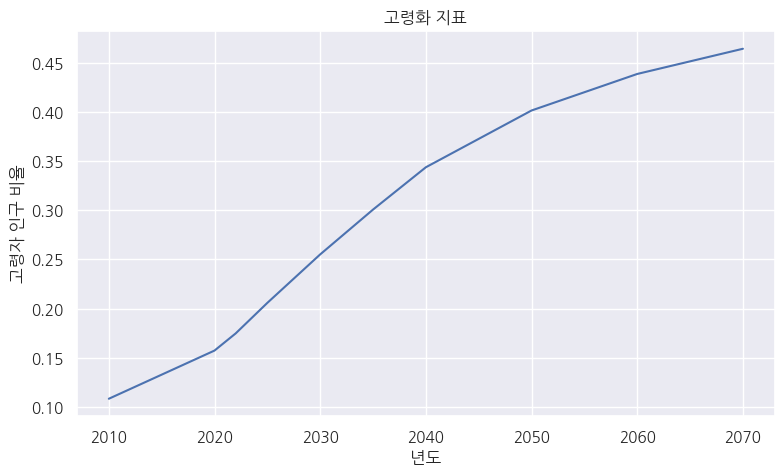

In [119]:
plt.title("고령화 지표")
plt.plot(aging_data["년도"], aging_data["비율"])
plt.xlabel("년도")
plt.ylabel("고령자 인구 비율")
plt.show()